<a href="https://colab.research.google.com/github/adams-gc/BF-python-class/blob/main/credict__classification__bank__data_project(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# To build a machine learning model for classifying credit scores based on the given dataset, we will follow these steps:

1. Data Understanding: Understand the dataset, its structure, and the significance of each column.
2. Data Preprocessing: Handle missing values, convert data types, and encode categorical variables.
3. Feature Selection: Select relevant features for the model.
4. Train-Test Split: Split the dataset into training and testing sets.
5. Model Selection: Choose an appropriate machine learning algorithm for classification.
6. Model Training: Train the model on the training data.
7. Model Evaluation: Evaluate the model's performance on the test data.
8. Prediction: Predict credit scores based on new data.
*  



In [1]:
# "C:\Users\adams\Downloads\test.csv\test.csv"

In [2]:
import pandas as pd
import numpy as np
df= pd .read_csv('/content/test.csv')

In [3]:
df.head()

ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12            1824.843333                  3  ...   
2  Scientist      19114.12            1824.843333                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4    _______      34847.84            3037.986667                  2  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                2022.0        Good           809.98                35.030402   
1                   4.0        Good           809.98                33.053114   
2                   4.0        Good           809.98                33.811894   
3                   4.0        Good           809.98                32.430559   
4                   5.0        Good           605.03                25.926822   

       Credit_History_Age Payment_of_Min_Amount Total_EMI_per_month  \
0   22 Years and 9 Months                    No           49.574949   
1  22 Years and 10 Months                    No           49.574949   
2                     NaN                    No           49.574949   
3   23 Years and 0 Months                    No           49.574949   
4   27 Years and 3 Months                    No           18.816215   

   Amount_invested_monthly                 Payment_Behaviour  \
0       236.64268203272135    Low_spent_Small_value_payments   
1       21.465380264657146  High_spent_Medium_value_payments   
2       148.23393788500925   Low_spent_Medium_value_payments   
3        39.08251089460281  High_spent_Medium_value_payments   
4       39.684018417945296   High_spent_Large_value_payments   

      Monthly_Balance  
0  186.26670208571772  
1  361.44400385378196  
2  264.67544623342997  
3  343.82687322383634  
4   485.2984336755923  

[5 rows x 27 columns]

#identify missing data

In [4]:
df.info()  # Overview of non-null counts and data types for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [5]:
# Identify missing values in the dataset
missing_value=df.isnull().sum()
print(f'missing value in each columns:\n:{missing_value}')

missing value in each columns:
:ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64


In [6]:
# Calculate the percentage of missing values for better understanding
missing_percentege=(missing_value/len(df))*100
print(f'missing value in each columns:\n:{missing_percentege}')

missing value in each columns:
:ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                        10.030
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       14.996
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       6.996
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         2.070
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           8.940
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.542
Payment_Behaviour            0.000
Monthly_Balance              1.124
dtype: float64


# analyzing the messing value

#From this analysis, we can determine if we should:

- Impute missing values (mean/median/mode or advanced techniques).
- Drop columns or rows if the missing data is excessive and cannot be imputed effectively.

In [7]:
# Filter columns with significant missing values (> 5%)
siggnificant_missing= missing_percentege[missing_percentege>5]
print(f'significant missing value in each columns:\n:{siggnificant_missing}')

significant missing value in each columns:
:Name                      10.030
Monthly_Inhand_Salary     14.996
Type_of_Loan              11.408
Num_of_Delayed_Payment     6.996
Credit_History_Age         8.940
dtype: float64


In [8]:
# # Calculate the median of 'Monthly_Inhand_Salary'
# median_salary = df['Monthly_Inhand_Salary'].median()

# # Impute missing values with the median
# df['Monthly_Inhand_Salary'].fillna(median_salary, inplace=True)

# # Verify if there are any missing values left in the column
# print("Missing values in 'Monthly_Inhand_Salary' after imputation:", df['Monthly_Inhand_Salary'].isnull().sum())


In [9]:
# # Calculate the mode of 'Type_of_Loan'
# mode_loan = df['Type_of_Loan'].mode()[0]

# # Impute missing values with the mode
# df['Type_of_Loan'].fillna(mode_loan, inplace=True)

# # Verify if there are any missing values left in the column
# print("Missing values in 'Type_of_Loan' after imputation:", df['Type_of_Loan'].isnull().sum())


In [10]:
# # Convert 'Num_of_Delayed_Payment' to numeric, coercing errors
# df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

# # Calculate the median of 'Num_of_Delayed_Payment'
# median_delayed_payment = df['Num_of_Delayed_Payment'].median()

# # Impute missing values with the median
# df['Num_of_Delayed_Payment'].fillna(median_delayed_payment, inplace=True)

# # Verify if there are any missing values left in the column
# print("Missing values in 'Num_of_Delayed_Payment' after imputation:", df['Num_of_Delayed_Payment'].isnull().sum())


In [11]:
# import re

# # Function to convert "years months" format into total months
# def parse_credit_history_age(value):
#     if pd.isnull(value):
#         return None
#     match = re.match(r"(\d+)\s+years?\s+(\d+)\s+months?", value)
#     if match:
#         years = int(match.group(1))
#         months = int(match.group(2))
#         return years * 12 + months
#     return None

# # Apply the parsing function
# df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(parse_credit_history_age)

# # Calculate the median of the parsed months
# median_history_age = df['Credit_History_Age_Months'].median()

# # Impute missing values with the median
# df['Credit_History_Age_Months'].fillna(median_history_age, inplace=True)

# # Optional: Convert back to "years months" format if needed
# df['Credit_History_Age'] = df['Credit_History_Age_Months'].apply(
#     lambda x: f"{x // 12} years {x % 12} months"
# )

# # Drop the helper column
# df.drop(columns=['Credit_History_Age_Months'], inplace=True)

# # Verify if there are any missing values left
# print("Missing values in 'Credit_History_Age' after imputation:", df['Credit_History_Age'].isnull().sum())


In [12]:
# Handling missing values for numerical columns
numerical_columns = ['Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Total_EMI_per_month']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Handling missing values for categorical columns
categorical_columns = ['Name', 'Type_of_Loan', 'Num_of_Loan', 'Num_of_Delayed_Payment',
                       'Credit_History_Age', 'Amount_invested_monthly']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Check if missing values are handled
missing_values_after = df.isnull().sum()
print("Missing values after handling:\n", missing_values_after)


Missing values after handling:
 ID                            0
Customer_ID                   0
Month                         0
Name                          0
Age                           0
SSN                           0
Occupation                    0
Annual_Income                 0
Monthly_Inhand_Salary         0
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                   0
Type_of_Loan                  0
Delay_from_due_date           0
Num_of_Delayed_Payment        0
Changed_Credit_Limit          0
Num_Credit_Inquiries          0
Credit_Mix                    0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age            0
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Amount_invested_monthly       0
Payment_Behaviour             0
Monthly_Balance             562
dtype: int64


In [13]:
# Check for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Remove duplicate rows
df = df.drop_duplicates()

# Verify duplicates are removed
print(f"Number of rows after removing duplicates: {df.shape[0]}")


Number of duplicate rows: 0
Number of rows after removing duplicates: 50000


In [14]:
# detecting invalid values
# Convert 'Age' to numeric and check for invalid entries
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
invalid_ages = df[df['Age'] < 0]
print(f"Number of invalid ages: {invalid_ages.shape[0]}")

Number of invalid ages: 464


In [15]:
# Convert 'Annual_Income' to numeric and check for invalid entries
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
invalid_income = df[df['Annual_Income'] < 0]
print(f"Number of invalid annual incomes: {invalid_income.shape[0]}")


Number of invalid annual incomes: 0


In [16]:
# Summary of data type mismatches
print("Data types summary:\n", df.dtypes)

Data types summary:
 ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: 

In [17]:
# Example of handling: Drop rows with invalid values
df = df[df['Age'] >= 0]
df = df[df['Annual_Income'] >= 0]

In [18]:
# 1. Validate and convert `Credit_History_Age` to total months
def convert_credit_history_to_months(value):
    try:
        years, months = 0, 0
        if 'yrs' in value:
            years = int(value.split('yrs')[0].strip())
        if 'mon' in value:
            months = int(value.split('mon')[0].split()[-1].strip())
        return years * 12 + months
    except:
        return None

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_credit_history_to_months)

# 2. Convert `Num_of_Loan` to numeric
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')

# 3. Fix `Monthly_Balance`
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'] = df['Monthly_Balance'].apply(lambda x: x if x >= 0 else None)

# 4. Correct `Num_of_Delayed_Payment`
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: x if x >= 0 else None)

# # 5. Ensure logical consistency for salary and income

df['Monthly_Inhand_Salary'] = df.apply(
    lambda row: row['Monthly_Inhand_Salary']
    if row['Monthly_Inhand_Salary'] is None or (row['Monthly_Inhand_Salary'] * 12 <= row['Annual_Income'])
    else None,
    axis=1
)



# 6. Standardize categorical data
valid_loans = ['Personal Loan', 'Auto Loan', 'Mortgage', 'Home Loan']
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x if x in valid_loans else None)
valid_payment_behaviors = ['High Spend', 'Low Spend', 'No Spend']
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(
    lambda x: x if x in valid_payment_behaviors else None
)

# Display summary of cleaned data
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 43768 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        43768 non-null  object 
 1   Customer_ID               43768 non-null  object 
 2   Month                     43768 non-null  object 
 3   Name                      43768 non-null  object 
 4   Age                       43768 non-null  float64
 5   SSN                       43768 non-null  object 
 6   Occupation                43768 non-null  object 
 7   Annual_Income             43768 non-null  float64
 8   Monthly_Inhand_Salary     23079 non-null  float64
 9   Num_Bank_Accounts         43768 non-null  int64  
 10  Num_Credit_Card           43768 non-null  int64  
 11  Interest_Rate             43768 non-null  int64  
 12  Num_of_Loan               41617 non-null  float64
 13  Type_of_Loan              1064 non-null   object 
 14  Delay_from_

# handaling outliers
#Actions:
- Identify Outliers:
 - .Use box plots to visually detect outliers.
 - .Compute the Interquartile Range (IQR) for numerical columns.
- Handle Outliers:
 - .Capping: Replace extreme values with -  .upper/lower boundaries based on IQR.
  - Transformation: Apply log or square root transformations to reduce the impact of outliers.


In [19]:
# import numpy as np

# # Identify numerical columns
# numerical_columns = ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
#                      'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
#                      'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
#                      'Credit_Utilization_Ratio', 'Total_EMI_per_month']

# # Compute IQR and handle outliers for each numerical column
# for col in numerical_columns:
#     if col in df.columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1

#         # Define lower and upper bounds
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Capping outliers
#         df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
#         df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# # Display summary of changes
# print(df[numerical_columns].describe())


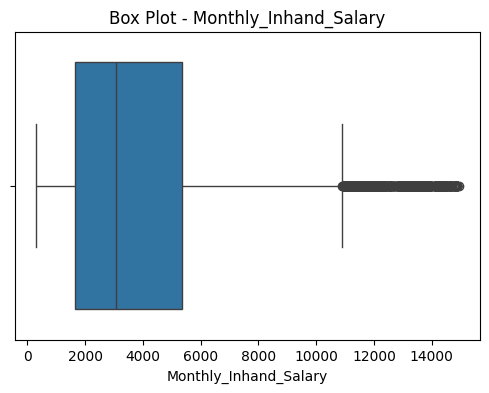

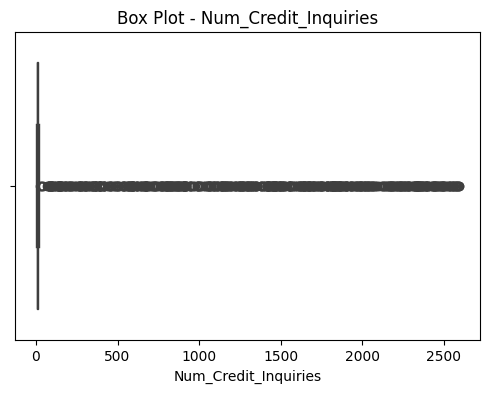

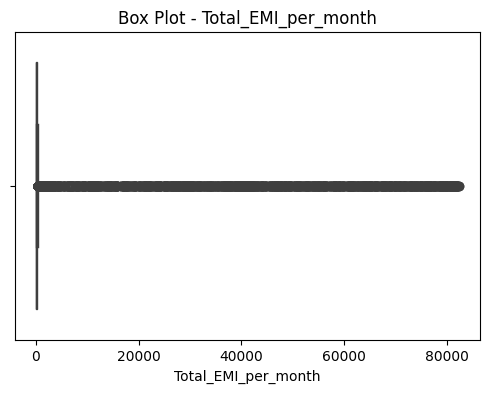

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualize distributions with box plots
for col in numerical_columns:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot - {col}')
        plt.show()

# # Refined handling based on column characteristics
# for col in numerical_columns:
#     if col in df.columns:
#         # Compute IQR
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1

#         # Define bounds
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Apply log transformation for skewed data
#         if df[col].skew() > 1 or df[col].skew() < -1:
#             df[col] = np.log1p(df[col])  # Log transformation
#         else:
#             # Remove extreme outliers beyond bounds
#             df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# # Display summary after refinement
# print(df[numerical_columns].describe())


In [21]:

# Refined handling based on column characteristics
for col in numerical_columns:
    if col in df.columns:
        # Compute IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply log transformation for skewed data
        if df[col].skew() > 1 or df[col].skew() < -1:
            df[col] = np.log1p(df[col])  # Log transformation
        else:
            # Remove extreme outliers beyond bounds
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Display summary after refinement
print(df[numerical_columns].describe())


       Monthly_Inhand_Salary  Num_Credit_Inquiries  Total_EMI_per_month
count           23079.000000          43768.000000         43768.000000
mean                8.008321              2.060042             4.212643
std                 0.777710              0.877148             1.983286
min                 5.719149              0.000000             0.000000
25%                 7.417522              1.609438             3.503333
50%                 8.035054              2.079442             4.328961
75%                 8.586793              2.397895             5.178879
max                 9.611164              7.860956            11.318709


In [22]:
# Dropping unwanted columns
columns_to_drop = [
    'ID',                      # Unique identifier with no predictive value
    'Customer_ID',             # Similar to 'ID', not useful for modeling
    'Name',                    # Contains personal information, not useful
    'SSN',                     # Irrelevant for analysis
    'Type_of_Loan',            # High percentage of missing values
    'Changed_Credit_Limit',    # Less relevant for analysis
    'Credit_Mix',              # Qualitative data not useful for modeling
    'Payment_of_Min_Amount'    # Qualitative and less relevant
]

# Dropping the columns
df = df.drop(columns=columns_to_drop, axis=1)

# Display the updated dataframe information
print("Columns after dropping unwanted columns:")
print(df.info())


Columns after dropping unwanted columns:
<class 'pandas.core.frame.DataFrame'>
Index: 43768 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     43768 non-null  object 
 1   Age                       43768 non-null  float64
 2   Occupation                43768 non-null  object 
 3   Annual_Income             43768 non-null  float64
 4   Monthly_Inhand_Salary     23079 non-null  float64
 5   Num_Bank_Accounts         43768 non-null  int64  
 6   Num_Credit_Card           43768 non-null  int64  
 7   Interest_Rate             43768 non-null  int64  
 8   Num_of_Loan               41617 non-null  float64
 9   Delay_from_due_date       43768 non-null  int64  
 10  Num_of_Delayed_Payment    42278 non-null  float64
 11  Num_Credit_Inquiries      43768 non-null  float64
 12  Outstanding_Debt          43768 non-null  object 
 13  Credit_Utilization_Ratio 

In [23]:
# Descriptive statistics for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Descriptive Statistics for Numerical Features:")
print(df[numerical_columns].describe())


Descriptive Statistics for Numerical Features:
                Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  43768.000000   4.376800e+04           23079.000000       43768.000000   
mean     116.875891   1.648541e+05               8.008321          16.807371   
std      684.971464   1.333590e+06               0.777710         116.438920   
min       14.000000   7.005930e+03               5.719149          -1.000000   
25%       25.000000   1.945305e+04               7.417522           3.000000   
50%       34.000000   3.760991e+04               8.035054           6.000000   
75%       43.000000   7.278306e+04               8.586793           7.000000   
max     8688.000000   2.413726e+07               9.611164        1798.000000   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count     43768.000000   43768.000000  41617.000000         43768.000000   
mean         23.102609      69.246047      3.437826            21.076334   
std 

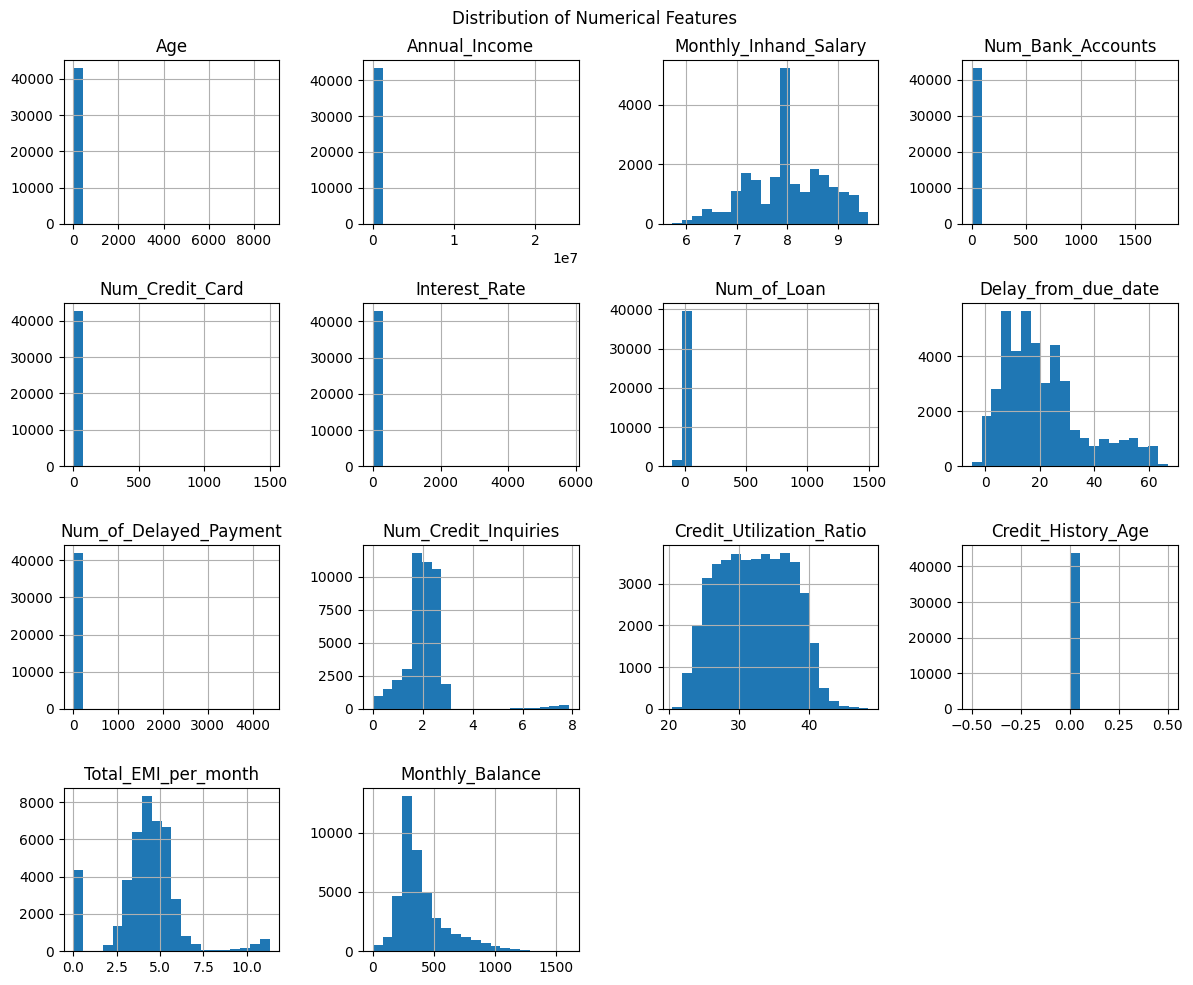

In [24]:
#  Distribution Analysis:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
df[numerical_columns].hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()


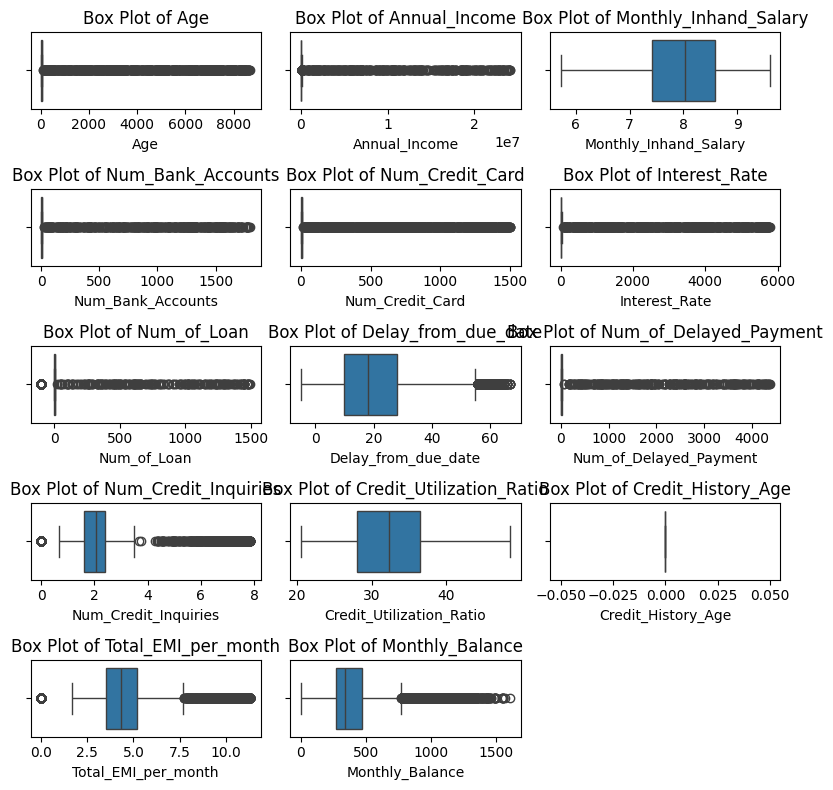

In [25]:
# Plot box plots for numerical features

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_columns)
num_rows = (num_cols + 2) // 3  # Calculate rows, ensuring at least 3 columns

# Plot box plots for numerical features
plt.figure(figsize=(8, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Use calculated rows and 3 columns
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

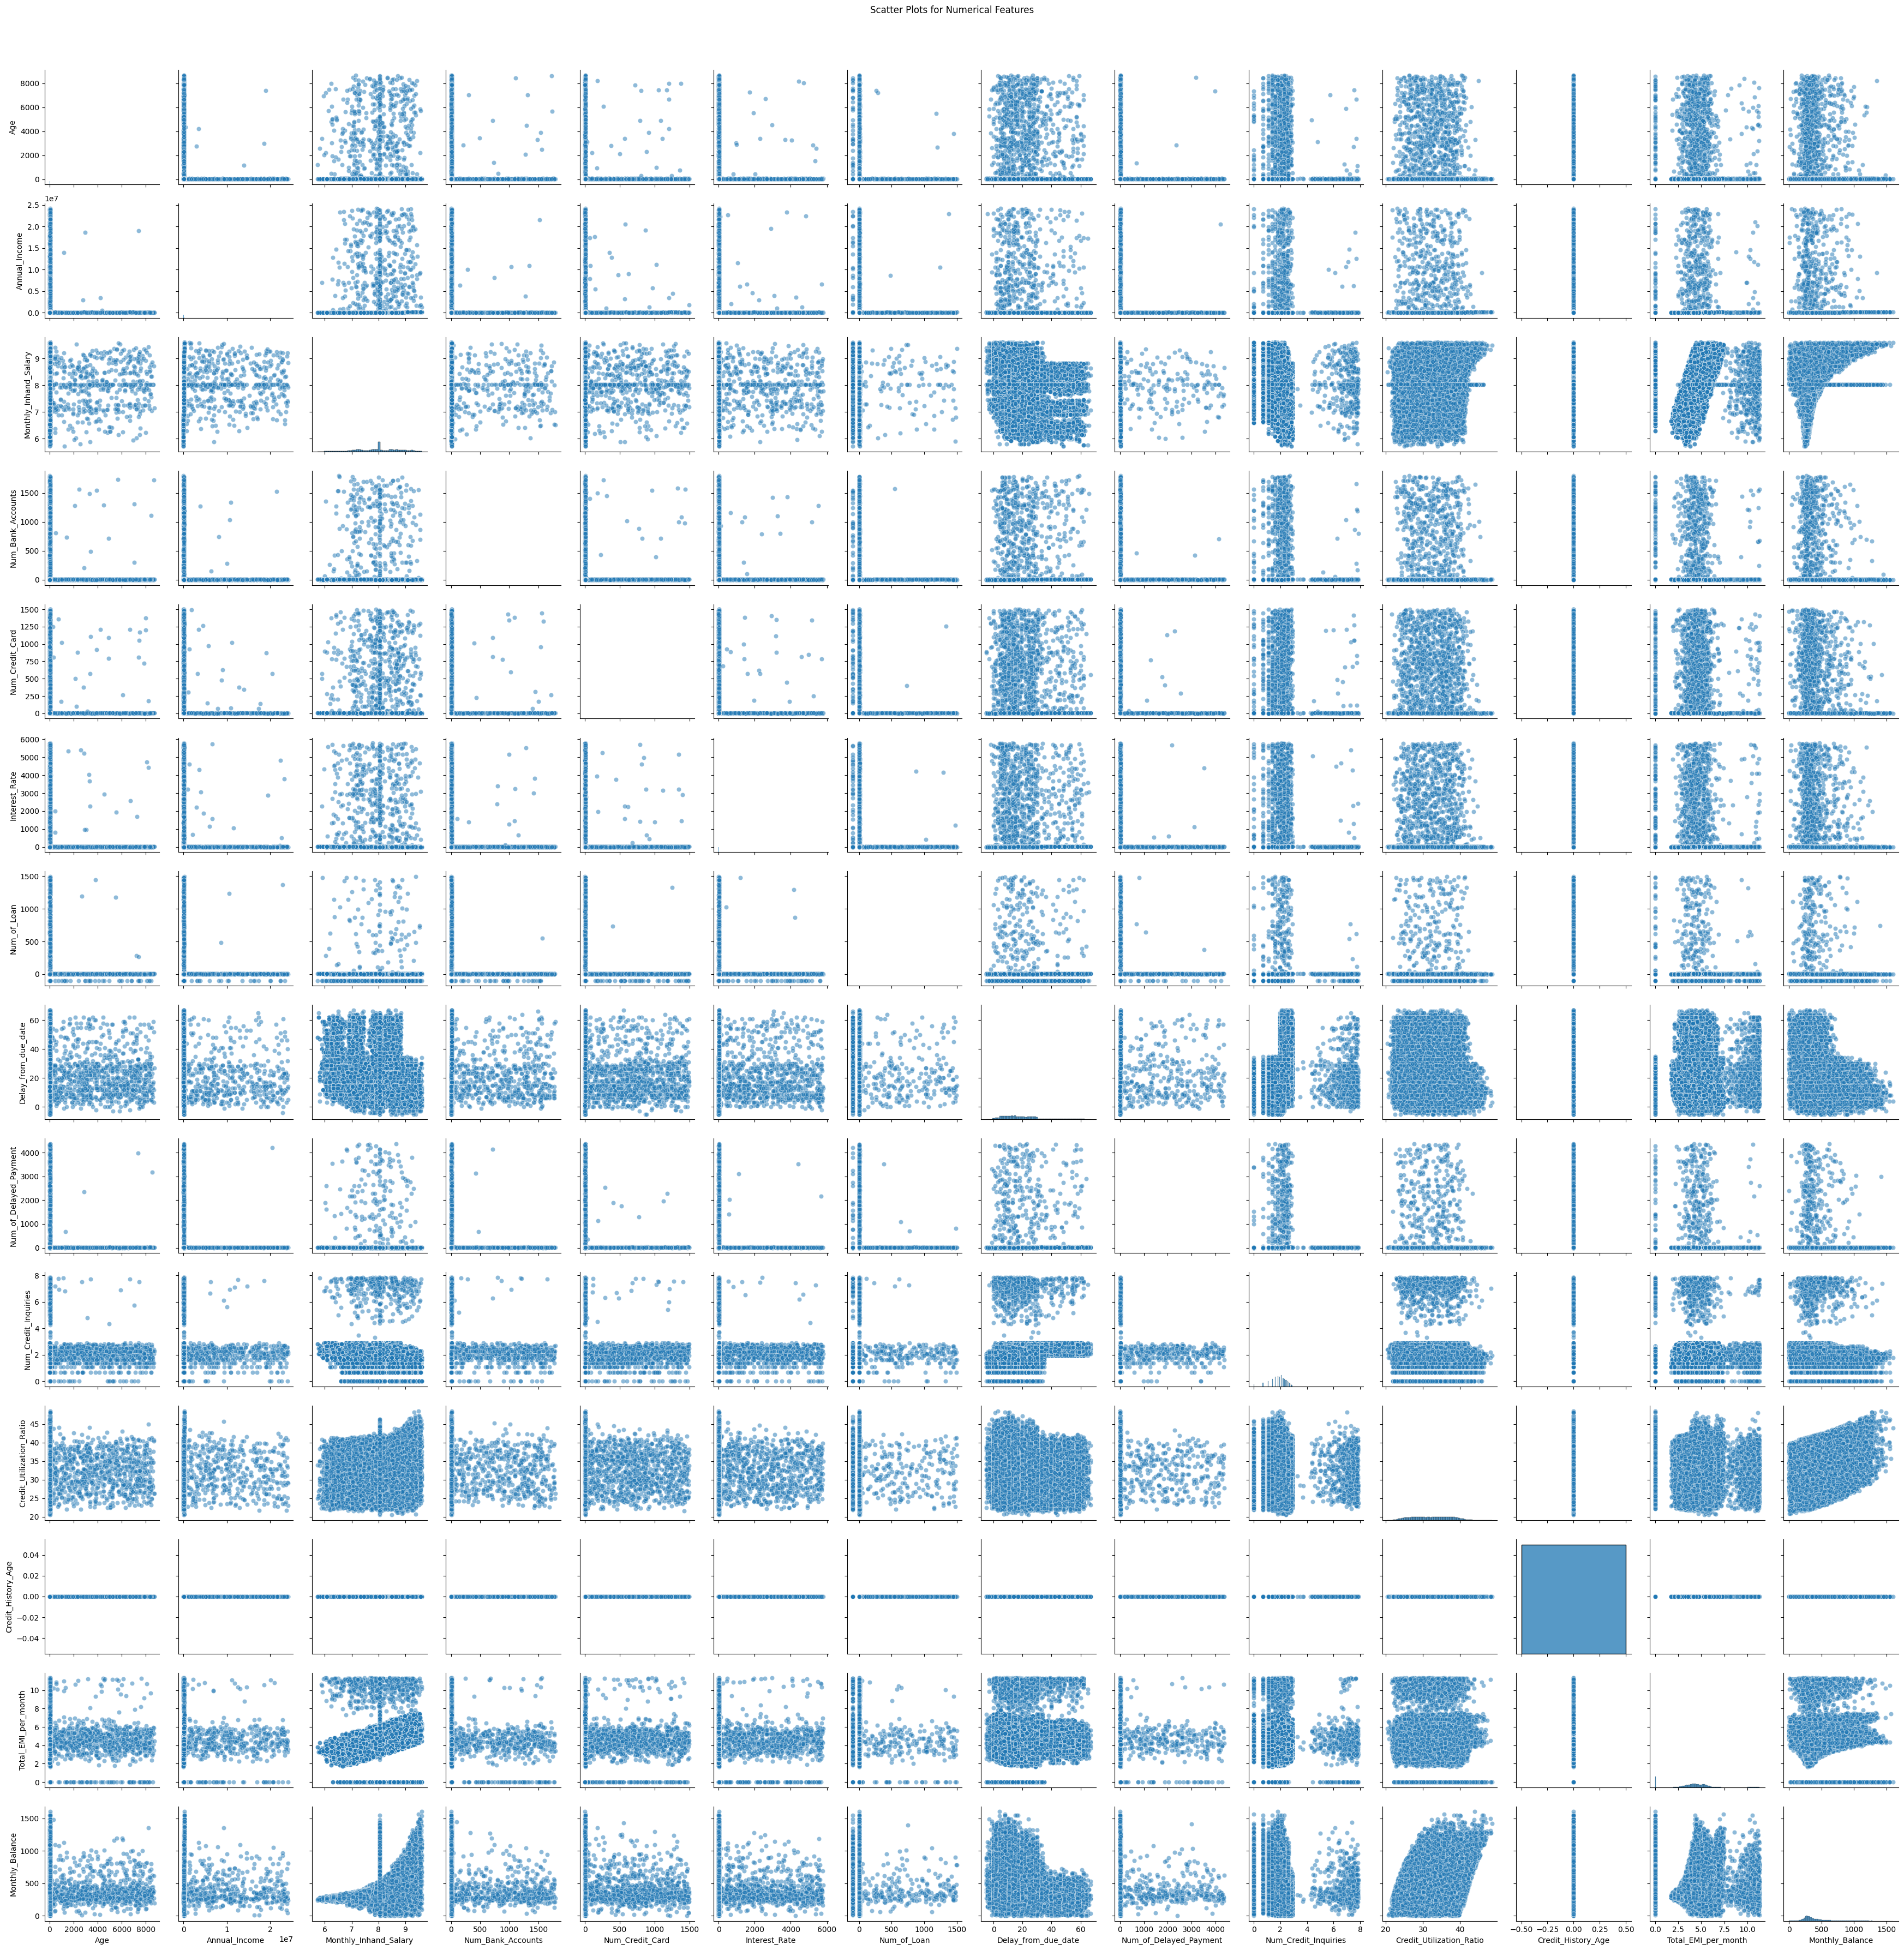

In [26]:
# Plot scatter plots for numerical feature relationships
plt.figure(figsize=(10, 6))
sns.pairplot(df[numerical_columns], plot_kws={'alpha':0.5})
plt.suptitle("Scatter Plots for Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


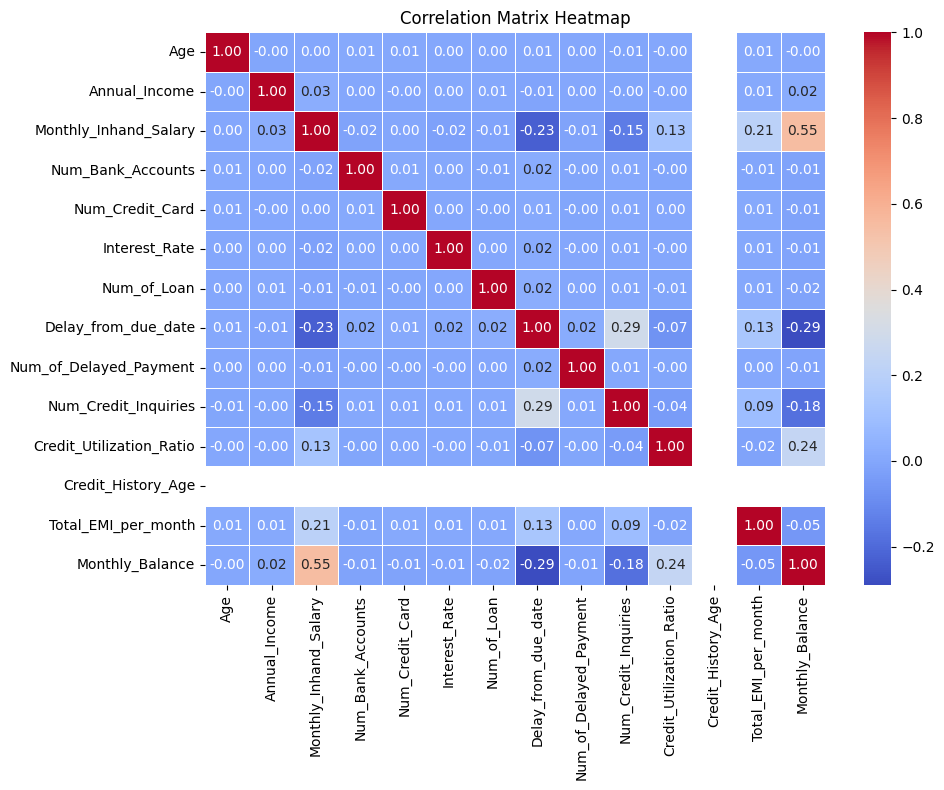

In [27]:
# Compute the correlation matrix only for numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()



In [28]:

# Threshold for low correlation
correlation_threshold = 0.1

# Identify columns to keep (only numerical columns)
numerical_columns = df.select_dtypes(include=['number']).columns
columns_to_keep = []
for column in correlation_matrix.columns:  # Iterate through numerical columns only
    if any(abs(correlation_matrix[column]) > correlation_threshold):
        columns_to_keep.append(column)

# Columns to drop (exclude numerical columns to keep)
columns_to_drop = [column for column in df.columns if column not in columns_to_keep and column in numerical_columns]

# Drop less correlated columns
df_cleaned = df.drop(columns=columns_to_drop)

# Output results
print("Columns to Drop:", columns_to_drop)
print("Columns to Keep:", columns_to_keep)
#print("Cleaned DataFrame:")
#print(df_cleaned.head())

Columns to Drop: ['Credit_History_Age']
Columns to Keep: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Monthly_Balance']


In [29]:
# FEATURE ENGENEARING
# Check for missing values
missing_values = df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                     'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                     'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio',
                     'Total_EMI_per_month', 'Monthly_Balance']].isnull().sum()

print("Missing Values:")
print(missing_values)

Missing Values:
Age                             0
Annual_Income                   0
Monthly_Inhand_Salary       20689
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  2151
Delay_from_due_date             0
Num_of_Delayed_Payment       1490
Num_Credit_Inquiries            0
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Monthly_Balance               484
dtype: int64


In [30]:
# Impute missing values (if any)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Annual_Income'].fillna(df['Annual_Income'].median(), inplace=True)
df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median(), inplace=True)
df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].median(), inplace=True)
df['Num_Credit_Card'].fillna(df['Num_Credit_Card'].median(), inplace=True)
df['Interest_Rate'].fillna(df['Interest_Rate'].median(), inplace=True)
df['Num_of_Loan'].fillna(df['Num_of_Loan'].median(), inplace=True)
df['Delay_from_due_date'].fillna(df['Delay_from_due_date'].median(), inplace=True)
df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median(), inplace=True)
df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), inplace=True)
df['Credit_Utilization_Ratio'].fillna(df['Credit_Utilization_Ratio'].median(), inplace=True)
df['Total_EMI_per_month'].fillna(df['Total_EMI_per_month'].median(), inplace=True)
df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(), inplace=True)

<ipython-input-30-78214ea2f2ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-30-78214ea2f2ef>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [31]:
# feature scsling
from sklearn.preprocessing import StandardScaler

# Select the numerical columns for scaling
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                     'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                     'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio',
                     'Total_EMI_per_month', 'Monthly_Balance']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical features
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [33]:
# creating new feature
# dabit to income ratio(DTI)
# Debt-to-Income Ratio
df['DTI_Ratio'] = df['Total_EMI_per_month'] / df['Monthly_Inhand_Salary']
df['DTI_Ratio']

0        -5.843141
1        -5.843141
2        -5.843141
4       -24.774756
5       -24.774756
           ...    
49995    -1.739219
49996   -12.653430
49997   -12.653430
49998   -12.653430
49999   -12.653430
Name: DTI_Ratio, Length: 43768, dtype: float64

In [34]:
# Loan-to-Income Ratio
df['LTI_Ratio'] = df['Num_of_Loan'] / df['Monthly_Inhand_Salary']


In [35]:
# Credit Utilization per Loan
df['Credit_Utilization_per_Loan'] = df['Credit_Utilization_Ratio'] / df['Num_of_Loan']


In [37]:
# Delayed Payments Ratio
df['Delayed_Payment_Ratio'] = df['Num_of_Delayed_Payment'] / df['Num_of_Loan']


In [38]:
# Bank Accounts to Credit Cards Ratio
df['Bank_Account_to_Credit_Card_Ratio'] = df['Num_Bank_Accounts'] / df['Num_Credit_Card']


In [39]:
# catagorical encoding


In [48]:
# # Recursive Feature Elimination (RFE), Correlation Analysis, or Tree-based methods like Random Forest for ranking feature importance.
# from sklearn.ensemble import RandomForestClassifier
# import numpy as np

# # Fit a random forest classifier to compute feature importance
# model = RandomForestClassifier()
# model.fit(df[numerical_columns], target)  # Assuming target is your outcome variable

# # Get feature importance
# importance = model.feature_importances_

# # Sort features by importance
# feature_importance = sorted(zip(numerical_columns, importance), key=lambda x: x[1], reverse=True)

# # Display the feature importance
# for feature, score in feature_importance:
#     print(f"Feature: {feature}, Importance: {score}")



# Recursive Feature Elimination (RFE), Correlation Analysis, or Tree-based methods like Random Forest for ranking feature importance.
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming 'Credit_Score' or a similar column is your target variable
# If the column name is different, replace 'Credit_Score' with the correct name
target_column = 'Credit_Utilization_Ratio'  # or 'credit_score', 'target', etc.

# Check if the target column exists in the DataFrame
if target_column in df.columns:
    target = df[target_column]  # Define target variable #This line extracts the target data from the DataFrame
else:
    raise KeyError(f"Target column '{target_column}' not found in the DataFrame. Please check the column name.")

# Fit a random forest classifier to compute feature importance
model = RandomForestClassifier()
model.fit(df[numerical_columns], target)  # Use the extracted target data (target) instead of the column name (target_column)

# Sort features by importance
feature_importance = sorted(zip(numerical_columns, importance), key=lambda x: x[1], reverse=True)

# Display the feature importance
for feature, score in feature_importance:
    print(f"Feature: {feature}, Importance: {score}")

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# ... (previous code)

# Recursive Feature Elimination (RFE), Correlation Analysis, or Tree-based methods like Random Forest for ranking feature importance.
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming 'Credit_Score' or a similar column is your target variable
# If the column name is different, replace 'Credit_Score' with the correct name
target_column = 'Credit_Score'  # or 'credit_score', 'target', etc.

# Check if the target column exists in the DataFrame
if target_column in df.columns:
    target = df[target_column]  # Define target variable
else:
    raise KeyError(f"Target column '{target_column}' not found in the DataFrame. Please check the column name.")

# Fit a random forest classifier to compute feature importance
model = RandomForestClassifier()
model.fit(df[numerical_columns], target)  # Assuming target is your outcome variable

# ... (rest of the code)